In [1]:
import sys, os

sys.path.append(os.path.abspath("Datasets"))
sys.path.append(os.path.abspath("Images"))

### Regression models:
- Can be linear or non-linear
- Used for predicting a **real** value (like salary)
- Linear regression, Support vector regression, Random Forests regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
dataset = pd.read_csv("Datasets/ML_a_z/Salary_Data.csv")

In [4]:
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Salary problem
- Dependent variable: Salary (to be predicted)
- Independent variable: Years of Experience
- Train the machine so that the salary can be predicted in the future given 1 input: years of experience
- What is the correlation between YOE and Salary?

### Linear Regressions:
- Line equation:
$$y = b_o + b_1.x_1$$
- $y$  : Dependent variable
- $x_1$: Independent variable
- $b_1$: Coefficient, slope of line
- $b_0$: constant

**Figure 1: Salary problem Linear regression**
<img src="Images/2_1_Linear_Regression.JPG">

- As in the figure, $b_o$ is the offset (threshold), lowest salary with 0 experience
- $b_1$ is the slope of the line 



### Ordinary Least Squares

**Figure 2: Ordinary Least Squares**
<img src="Images/2_2_Ordinary_Least_Squares.JPG">

- The red dot is where that person's salary sitting, while he should be at the green dot according to the model.
- So we need to calculate the error (difference between the observes and the model) and then minimize the error


* **regression:** *a measure of the relation between the mean value of one variable (e.g. output) and corresponding values of other variables (e.g. time and cost).*
* **Linear regression:** *Relationship between a scalar (real number) dependent variable y and one or more independent variable $x_i$*


In [5]:
# Importing the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
dataset = pd.read_csv("Datasets/ML_a_z/Salary_Data.csv")

In [41]:
X = dataset.iloc[:, 0].values
Y = dataset.iloc[:, 1].values

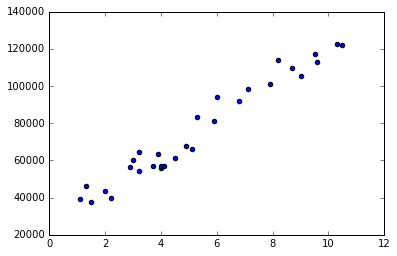

In [42]:
plt.scatter(X, Y)

### Method 1: Manually calculate partial derivative
$$\hat{y} = b_0 + b_1.x$$
$$E = \sum{(y - \hat{y})^2}$$
$$E = \sum{(y - (b_1.x + b_0))^2}$$
- We have to minimize E by calculating the partial derivative
$$\frac{\partial E}{\partial \hat{y}} = 0$$
or
$\frac{\partial E}{\partial b_0} = 0$ and $\frac{\partial E}{\partial b_1} = 0$
- **Solution:**
$$b_1 = \frac{\bar{xy} - \bar{x}\bar{y}}{\bar{x^2} - \bar{x}^2}$$
and 
$$b_0 = \frac{\bar{y}\bar{x^2} - \bar{x}\bar{xy}}{\bar{x^2} - \bar{x}^2}$$

- Numpy trick:
$$a^T.b = \sum{a_i.b_i}$$

In [43]:
denominator = X.dot(X) - X.mean() * X.sum()
b_1 = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b_0 = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

In [44]:
# Calculate y^ = ax + b
y_hat = b_1*X + b_0

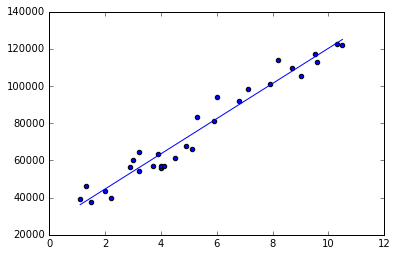

In [45]:
# Plot all:
plt.scatter(X, Y)
plt.plot(X, y_hat)

### Method 2: Using library

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [47]:
dataset = pd.read_csv("Datasets/ML_a_z/Salary_Data.csv")
X = dataset.iloc[:, 0].to_frame()
Y = dataset.iloc[:, 1].to_frame()

In [48]:
# Split data to test and training set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                   test_size=0.2,
                                                   random_state=0)

In [49]:
# Use training set for learning, and use test set for testing
# Now fitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression

In [50]:
regressor = LinearRegression()

In [51]:
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
# Predicting the test set result
y_pred = regressor.predict(X_test)

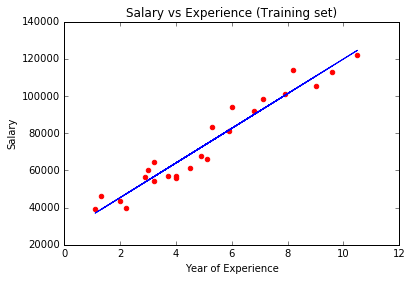

In [59]:
# Visualizing the training set result
plt.scatter(X_train, Y_train, color='red')
plt.plot(X_train, regressor.predict(X_train))
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")